In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
#Load the data set

bank= pd.read_csv('bank-full.csv', encoding='utf-8', delimiter=";")
print(bank.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [3]:
#Shape of the data set
bank.shape

(45211, 17)

In [4]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [6]:
# label_encoder object
label_encoder =LabelEncoder()

In [7]:
# Encode labels in column. 
bank['job']= label_encoder.fit_transform(bank['job'])
bank['marital']= label_encoder.fit_transform(bank['marital'])
bank['education']= label_encoder.fit_transform(bank['education'])
bank['default']= label_encoder.fit_transform(bank['default'])
bank['housing']= label_encoder.fit_transform(bank['housing'])
bank['loan']= label_encoder.fit_transform(bank['loan'])
bank['contact']= label_encoder.fit_transform(bank['contact'])
bank['month']= label_encoder.fit_transform(bank['month'])
bank['poutcome']= label_encoder.fit_transform(bank['poutcome'])
bank['y']= label_encoder.fit_transform(bank['y'])
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0
7,42,2,0,2,1,2,1,0,2,5,8,380,1,-1,0,3,0
8,58,5,1,0,0,121,1,0,2,5,8,50,1,-1,0,3,0
9,43,9,2,1,0,593,1,0,2,5,8,55,1,-1,0,3,0


In [8]:
# Removing NA values in data set
bank=bank.dropna()
bank.shape

(45211, 17)

In [9]:
# Dividing our data into input and output variables 
X = bank.iloc[:,1:]
Y = bank.iloc[:,16]

In [10]:
#Logistic regression and fit the model
bank=LogisticRegression()
bank.fit(X,Y)

C:\Users\dalwe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
#Predict for X dataset
y_pred = bank.predict(X)

In [12]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': bank.predict(X)})

In [13]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,1
45208,1,1
45209,0,0


In [14]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39129   793]
 [ 3278  2011]]


In [15]:
((39129+2011)/(39129+793+2011+3278))*100

90.99555417929265

In [16]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     39922
           1       0.72      0.38      0.50      5289

    accuracy                           0.91     45211
   macro avg       0.82      0.68      0.72     45211
weighted avg       0.90      0.91      0.90     45211



In [17]:
# ROC Curve

Text(0, 0.5, 'True Positive Rate')

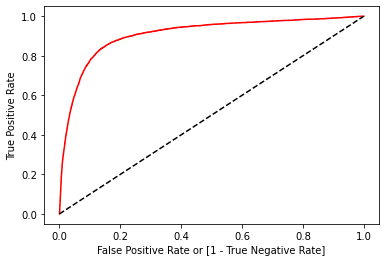

In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, bank.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [19]:
auc

0.6801796851373886